In [1]:
import pathlib
import pandas as pd
import iso8601.iso8601
import datetime
import matplotlib.pyplot as plt
import collections
import tqdm
import itertools
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)


def round(t):
    t = datetime.datetime(t.year, t.month, t.day, t.hour, t.minute, t.second, t.microsecond)
    return t


def makehash():
    return collections.defaultdict(makehash)


data_dir = pathlib.Path("LongTests")
crh_dir = data_dir.joinpath("cr-h")
cro_dir = data_dir.joinpath("cr-o")
mcf_dir = data_dir.joinpath("mcf")
nep_dir = data_dir.joinpath("neptune")
vsvbp_dir = data_dir.joinpath("vsvbp")

run_dirs = [nep_dir, vsvbp_dir, mcf_dir, cro_dir, crh_dir]
#run_dirs = [nep_dir, vsvbp_dir, mcf_dir]

runs = list(range(3))

functions = [
    "compression",
    # "dynamic-html",
    # "graph-bfs",
    # "graph-mst",
    # "thumbnailer",
]

# for run in runs:

#function = "compression"
run = 4

result = makehash()

for run_dir, function, run_n in tqdm.tqdm(list(itertools.product(run_dirs, functions, runs))):
    req_df = pd.read_csv(run_dir.joinpath(f"{function}/{function}_{run_n}_proxy_metric.csv"))
    req_df['timestamp'] = req_df['timestamp'].map(lambda x: iso8601.parse_date(x))
    req_df['timestamp'] = req_df['timestamp'].map(round)
    min_time = min(req_df['timestamp'])
    max_time = max(req_df['timestamp'])
    req_df['timestamp'] = req_df['timestamp'] - min_time
    req_df = req_df.sort_values('timestamp')

    res_df = pd.read_csv(run_dir.joinpath(f"{function}/{function}_{run_n}_pod_log.csv"))
    res_df = res_df[res_df["container_name"].map(lambda x: function in x)]
    res_df['timestamp'] = res_df['timestamp'].map(lambda x: iso8601.parse_date(x))
    res_df['timestamp'] = res_df['timestamp'].map(round)
    res_df = res_df[res_df['timestamp'] < max_time]
    res_df = res_df[res_df['timestamp'] > min_time]
    res_df['timestamp'] = res_df['timestamp'] - min_time
    res_df = res_df.sort_values('timestamp')

    # if run_dir is crh_dir:
    #     res_df = res_df[~res_df['pod_address'].isna()]
    # if run_dir is cro_dir:
    #     res_df['cpu'] = res_df['cpu'] + np.random.normal(0, 0.5, len(res_df['cpu']))

    # cpu = res_df.groupby("timestamp").sum()['cpu'].rolling(20, win_type="triang", min_periods=20).mean()
    # rt = req_df.groupby("timestamp").mean()['latency'].rolling(20, win_type="triang", min_periods=20).mean()

    # result[run_dir][function]['cpu'][run_n] = cpu.to_numpy()
    # result[run_dir][function]['rt'][run_n] = rt.to_numpy()





# stats_req = pd.DataFrame()

# #fig, ax = plt.subplots(ncols=int(len(functions)/2), nrows=2)
# fig, ax = plt.subplots(ncols=3, nrows=2)
# fig.set_size_inches(10, 4)
# for i, function in enumerate(functions):

#     axis = ax[int(i/3)][i % 3]

#     data = []
#     for run_dir in run_dirs:
#         run_arr = np.concatenate(list(result[run_dir][function]['rt'].values()))
#         run_arr = run_arr[~np.isnan(run_arr)]
#         data += [run_arr]
#         stats_req = stats_req.append({
#             'function': function,
#             'approach': run_dir,
#             'sum': sum(run_arr > (200 if function != "video-processing" else 20000)),
#             'len': len(run_arr),
#             'mean': np.mean(run_arr),#sum(run_arr)/len(run_arr),
#             'median': np.median(run_arr),
#             'min': np.min(run_arr),
#             'max': np.max(run_arr),
#             'std': np.std(run_arr),
#             'mse': np.mean(np.abs(run_arr - 100)),
#             'ratio': sum(run_arr > (200 if function != "video-processing" else 20000)) / len(run_arr)
#         }, ignore_index=True)

#     # data = np.concatenate(data)
#     axis.set_title(function)
#     axis.boxplot(data, showfliers=False, showmeans=True)
#     ##axis.set(xticklabels=['Neptune', 'HPA', 'VPA'])
#     axis.set(xticklabels=['NEP', 'VSVBP', 'MCF', 'CR_O', 'CR_H'])
#     print(function)
#     if function != "video-processing":
#         axis.set_ylim([0, 500])
#     # else:
#         # axis.set_ylim([0, 60000])
#     axis.set_ylabel('Response Time (ms)')

# fig.tight_layout()
# fig.show()
# fig.savefig("single_response_time.pdf")
# stats_req.to_csv("stats_req.csv")

# stats_res = pd.DataFrame()

# #fig, ax = plt.subplots(ncols=int(len(functions)/2), nrows=2)
# fig, ax = plt.subplots(ncols=3, nrows=2)
# fig.set_size_inches(10, 4)
# for i, function in enumerate(functions):

#     axis = ax[int(i/3)][i % 3]

#     data = []
#     for run_dir in run_dirs:
#         run_arr = np.concatenate(list(result[run_dir][function]['cpu'].values()))
#         run_arr = run_arr[~np.isnan(run_arr)]
#         data += [run_arr]
#         stats_res = stats_res.append({
#             'function': function,
#             'approach': run_dir,
#             'len': len(run_arr),
#             'mean': sum(run_arr)/len(run_arr),
#             'mse': np.mean(np.abs(run_arr - 100)),
#         }, ignore_index=True)

#     axis.set_title(function)
#     axis.boxplot(data, showfliers=False)
#     #axis.set(xticklabels=['Neptune', 'HPA', 'VPA'])
#     axis.set(xticklabels=['NEP', 'VSVBP', 'MCF', 'CR_O', 'CR_H'])
#     axis.set_ylabel('Cores')

# fig.tight_layout()
# fig.show()
# fig.savefig("single_cores.pdf")
# stats_res.to_csv("stats_res.csv")

100%|██████████| 15/15 [00:03<00:00,  3.96it/s]


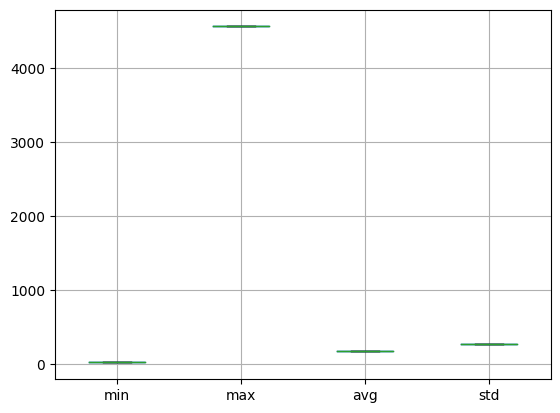

In [2]:
min1=23.785
max1=4568.26999999999
avg1=178.666208301335
std1=273.207040428097
df = pd.DataFrame(dict(min=min1, max=max1, avg=avg1, std=std1),index=[0])
df.boxplot()
plt.show()